In [1]:
from qutip import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Parameters
N = 10

gamma = 100
mag_f = np.array([1,1,1])
mag_fz = np.dot(mag_f,np.array([0,0,1]))
eps = np.pi/2.0

tau = 1/(gamma*mag_fz)

In [4]:
# Operators for qubit
sz = sigmaz()
sx = sigmax()

# Hamiltonian
H = (eps/(2.0*(np.sqrt(2))*tau))*(sz+sx)
print(H)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 55.53603673  55.53603673]
 [ 55.53603673 -55.53603673]]


In [5]:
# Direction of any Vector
def direction(vector): 
    x, y, z = vector[0],vector[1],vector[2]
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return np.array([theta, phi])

print(direction(np.array([0,0,1])))

[0. 0.]


In [6]:
# Making a Qubit
def qubit(angle):
    up = ket("0")
    down = ket("1")
    a = np.cos(angle[0]/2.0)
    b = np.exp(1j*angle[1])*np.sin(angle[0]/2.0)
    qubit = a*up + b*down
    
    return qubit

print(qubit([np.pi/2.0,0]))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]


In [15]:
z = np.array([0, 0, 1])
psi0 = qubit(direction(z))

In [16]:
t = 100
n = 500
tlist = np.linspace(0, t, n)
res = mesolve(H, psi0, tlist, [], [])
print(res)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0


In [17]:
res.states[50]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.00337514-0.70710275j]
 [ 0.        -0.70710275j]]

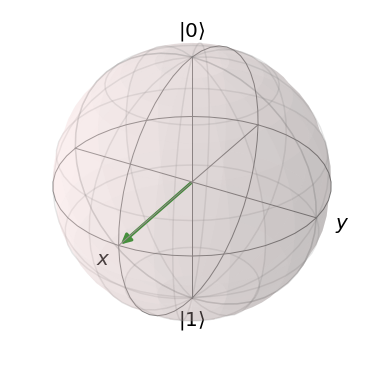

In [18]:
#Bloch Sphere 
bloch = Bloch()
bloch.add_states(res.states[50])
bloch.show()